<a href="https://colab.research.google.com/github/Gaikwadpawan3006/Perform-Exploratory-Data-Analysis-on-Terrorism-Dataset/blob/main/Perform_Exploratory_Data_Analysis_on_Terrorism_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 4: Perform-Exploratory-Data-Analysis-on-Terrorism Dataset**

## **Spark Foundation Inernship**

## **Name: Gaikwad Pawan Ramesh**

**Importing Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [9]:
import folium
from folium.plugins import MarkerCluster

In [7]:
dataset = pd.read_csv('globalterrorism.csv',encoding="latin1")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,31,33,61,62,76,79,94,96,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
dataset.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,NaN,NaN,0.0,1.0,0.0,1.0,Assassination,NaN,NaN,NaN,NaN,14.0,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,NaN,NaN,0.0,1.0,0.0,6.0,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7.0,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,NaN,NaN,0.0,1.0,0.0,1.0,Assassination,NaN,NaN,NaN,NaN,10.0,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,NaN,NaN,0.0,1.0,0.0,3.0,Bombing/Explosion,NaN,NaN,NaN,NaN,7.0,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0.0,NaN,NaN,1.0,1.0,1.0,-9.0,NaN,NaN,0.0,1.0,0.0,7.0,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7.0,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [38]:
dataset.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
27667,198603260049,1986,3,26,NaN,0,NaN,43,Chile,3,South America,Valparaiso,Valparaiso,-33.050125,-71.612251,1.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,NaN,NaN,1.0,1.0,0.0,3.0,Bombing/Explosion,NaN,NaN,NaN,NaN,1.0,Business,3.0,Bank/Commerce,NaN,"banks, power stations, supermarkets, buses, pu...",...,NaN,NaN,Explosive; Incendiary,0.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,"198603260049, 198603260001, 198603260002, 1986..."
27668,198603260050,1986,3,26,NaN,0,NaN,43,Chile,3,South America,Valparaiso,Valparaiso,-33.050125,-71.612251,1.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,NaN,NaN,1.0,1.0,0.0,3.0,Bombing/Explosion,NaN,NaN,NaN,NaN,1.0,Business,3.0,Bank/Commerce,NaN,"banks, power stations, supermarkets, buses, pu...",...,NaN,NaN,Explosive; Incendiary,0.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,"198603260050, 198603260001, 198603260002, 1986..."
27669,198603260051,1986,3,26,NaN,0,NaN,43,Chile,3,South America,Valparaiso,Valparaiso,-33.050125,-71.612251,1.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,NaN,NaN,1.0,1.0,0.0,3.0,Bombing/Explosion,NaN,NaN,NaN,NaN,1.0,Business,3.0,Bank/Commerce,NaN,"banks, power stations, supermarkets, buses, pu...",...,NaN,NaN,Explosive; Incendiary,0.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,"198603260051, 198603260001, 198603260002, 1986..."
27670,198603260052,1986,3,26,NaN,0,NaN,43,Chile,3,South America,Valparaiso,Valparaiso,-33.050125,-71.612251,1.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,NaN,NaN,1.0,1.0,0.0,3.0,Bombing/Explosion,NaN,NaN,NaN,NaN,1.0,Business,3.0,Bank/Commerce,NaN,"banks, power stations, supermarkets, buses, pu...",...,NaN,NaN,Explosive; Incendiary,0.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,"198603260052, 198603260001, 198603260002, 1986..."
27671,198603260053,1986,3,26,NaN,0,NaN,43,Chile,3,South America,Valparais,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
dataset.shape

(27672, 135)

In [11]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27672 entries, 0 to 27671
Columns: 135 entries, eventid to related
dtypes: float64(71), int64(7), object(57)
memory usage: 28.5+ MB


In [40]:
dataset.max()

eventid      198603260053
iyear                1987
imonth                 12
iday                   31
extended                1
                 ...     
nreleased             390
INT_LOG                 1
INT_IDEO                1
INT_MISC                1
INT_ANY                 1
Length: 80, dtype: object

In [12]:
dataset.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,gsubname3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,2.767200e+04,27672.000000,27672.000000,27672.000000,27672.000000,27672.000000,27672.000000,26234.000000,2.623400e+04,27671.000000,27671.000000,27671.000000,27671.000000,27671.000000,27671.000000,4695.000000,27671.000000,27671.000000,27671.000000,27671.000000,36.000000,2.000000,27671.000000,26234.000000,27559.000000,342.000000,256.000000,307.000000,53.000000,39.000000,52.000000,0.0,27671.000000,62.000000,4.00,27671.000000,4998.000000,1057.000000,1061.000000,266.000000,12.000000,11.000000,1.0,1.0,23.000000,27671.000000,22684.000000,1937.000000,1617.000000,318.000000,278.000000,59.000000,55.000000,22454.000000,1807.000000,1956.000000,20747.000000,1765.000000,1716.000000,27671.000000,12436.000000,5.842000e+03,27502.000000,2124.000000,2124.000000,598.000000,405.000000,27350.000000,4.850000e+02,1.0,1.020000e+02,2.0,821.000000,624.000000,27671.000000,27671.000000,27671.000000,27671.000000
mean,1.980418e+11,1980.354257,6.279199,15.114123,0.017021,162.314975,5.147514,20.704388,-3.318277e+03,1.384988,0.023129,0.991796,0.992592,0.851072,-1.299303,1.159318,0.066749,0.917820,0.000903,3.138195,4.777778,3.000000,7.424777,43.506137,131.392794,9.137427,48.390625,171.612378,7.018868,43.820513,141.557692,NaN,0.052221,0.241935,0.25,0.001879,3.147459,-76.052034,-0.074458,4.492481,0.916667,3.454545,1.0,1.0,0.391304,6.615446,10.581291,6.469282,10.034014,6.584906,9.773381,6.305085,10.400000,2.219783,0.326508,0.626278,1.631706,0.805666,0.073427,0.691410,3.495658,2.757716e+05,0.077231,0.946328,0.128060,25.581940,28.466667,0.017879,3.571107e+06,20000.0,1.196555e+06,0.0,2.936663,10.769231,-3.285931,-3.238119,0.198945,-2.423331
std,3.922739e+08,3.924702,3.426133,8.887569,0.129351,152.507886,3.254161,25.137287,5.321129e+05,1.074320,0.150316,0.090203,0.085755,0.356024,3.420707,0.453841,0.249591,0.274644,0.030045,1.946832,2.473992,1.414214,6.587514,32.185676,75.382823,6.729055,28.234934,109.613684,5.953314,27.618521,77.869024,NaN,0.222476,0.431751,0.50,0.043310,79.166334,42.375778,1.773792,3.066856,0.288675,3.416537,NaN,NaN,0.499011,2.424345,7.179343,1.908877,6.970461,2.129267,7.891576,1.545340,7.894208,9.703277,5.801027,3.266650,11.472039,18.092925,0.389923,0.715969,0.525564,7.440350e+06,0.266962,456.566424,3.986858,156.687166,138.147098,0.132515,4.580666e+07,NaN,4.526189e+06,0.0,1.359118,36.471735,4.427596,4.479306,0.696156,4.374893
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,2.000000,1.000000,1.000000,4.000000,1.000000,1.000000,11.000000,1.000000,7.000000,6.000000,NaN,0.000000,0.000000,0.00,0.000000,-99.000000,-99.000000,-9.000000,1.000000,0.000000,1.000000,1.0,1.0,0.000000,1.000000,1.000000,2.000000,2.000000,5.000000,2.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,2.000000,-9.900000e+01,0.000000,-99.000000,-99.000000,-99.000000,-99.000000,0.000000,0.000000e+00,20000.0,0.000000e+00,0.0,2.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.978103e+11,1978.000000,3.000000,7.000000,0.000000,61.000000,2.000000,7.733107,-8.507312e+01,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.

In [41]:
dataset.min()

eventid      197000000001
iyear                1970
imonth                  0
iday                    0
extended                0
                 ...     
nreleased             -99
INT_LOG                -9
INT_IDEO               -9
INT_MISC               -9
INT_ANY                -9
Length: 80, dtype: object

In [46]:
dataset.dtypes

eventid         int64
iyear           int64
imonth          int64
iday            int64
approxdate     object
               ...   
INT_LOG       float64
INT_IDEO      float64
INT_MISC      float64
INT_ANY       float64
related        object
Length: 135, dtype: object

In [13]:
dataset.corr()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,gsubname3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
eventid,1.000000,0.999931,-0.046981,-0.015670,-0.053917,-0.319650,-0.117369,-0.399481,-0.002807,0.163384,0.083992,-0.010749,0.036142,-0.114341,0.012997,-0.275917,0.065879,0.057935,0.029924,-0.032114,0.145104,1.0,0.109060,0.111963,-0.304741,-0.084857,-0.115872,-0.171057,-0.142250,-0.214116,-0.102096,NaN,0.063376,-0.426159,-0.549603,-0.014078,0.411907,0.355942,-0.103142,0.008347,0.644506,0.241105,NaN,NaN,-0.039812,0.005382,-0.093062,0.045006,0.007966,0.080395,0.246432,0.063504,0.028466,0.107338,0.033770,0.156639,0.032983,0.030936,0.142725,0.168272,0.210949,0.008240,-0.021951,0.013625,-0.019312,0.182219,-0.001706,-0.075189,0.001980,NaN,-0.147936,NaN,0.085625,0.093427,0.048472,0.046552,-0.187472,-0.040758
iyear,0.999931,1.000000,-0.055762,-0.015929,-0.053878,-0.319511,-0.116949,-0.398851,-0.002715,0.163530,0.084015,-0.011192,0.036143,-0.114322,0.013087,-0.275918,0.066044,0.057909,0.029776,-0.031923,0.144830,1.0,0.109126,0.111981,-0.304449,-0.085069,-0.116334,-0.171325,-0.145778,-0.218249,-0.100934,NaN,0.063386,-0.427094,-0.555556,-0.014120,0.411615,0.357378,-0.101694,0.015741,0.638285,0.240473,NaN,NaN,0.031970,0.005585,-0.092965,0.045158,0.007698,0.080162,0.247458,0.064846,0.029461,0.107184,0.033489,0.156281,0.032771,0.030709,0.142478,0.168132,0.210954,0.008156,-0.021999,0.013370,-0.019359,0.182098,-0.002092,-0.075116,0.002318,NaN,-0.149574,NaN,0.085079,0.093115,0.048514,0.046590,-0.187623,-0.040714
imonth,-0.046981,-0.055762,1.000000,0.012848,0.005912,0.002839,-0.035353,-0.040295,-0.010311,-0.027792,-0.008404,-0.006735,-0.001567,0.006757,-0.008495,0.010312,-0.024043,0.001581,0.015103,-0.020492,0.043128,NaN,-0.017078,-0.011864,-0.010730,0.029590,0.064805,0.036751,0.400164,0.555637,-0.068255,NaN,-0.001594,0.117280,0.088045,0.004987,0.029926,0.036118,-0.106457,0.037421,0.424280,-0.144676,NaN,NaN,0.381031,-0.023281,-0.011822,-0.020327,0.025463,0.002715,-0.114290,-0.105381,-0.071934,0.010396,0.036844,0.040802,0.021452,0.029753,0.021376,0.000267,-0.004161,0.008470,0.008978,0.026456,0.006150,0.011205,-0.017269,-0.004669,-0.035367,NaN,0.193698,NaN,0.030498,0.012610,-0.013513,-0.012626,0.027234,-0.009799
iday,-0.015670,-0.015929,0.012848,1.000000,-0.000024,0.016078,0.002969,-0.003090,-0.006164,-0.023542,-0.003322,0.009549,-0.004253,0.013554,-0.001041,-0.003699,-0.012872,0.000157,-0.001197,-0.043203,-0.218355,-1.0,0.002416,-0.000089,0.004399,-0.164729,-0.125365,-0.112294,0.001594,-0.167607,-0.082236,NaN,-0.004320,-0.342844,-0.338667,-0.003466,-0.019084,-0.013521,-0.011175,0.065318,0.155425,0.148086,NaN,NaN,-0.290890,-0.030512,0.020304,0.038849,0.013815,0.080483,-0.045602,-0.022136,0.001970,-0.003988,0.022189,0.033359,0.001862,0.013303,0.020906,0.001903,0.012297,0.017539,-0.005998,-0.037220,-0.012561,-0.058776,0.022166,-0.003457,0.000669,NaN,0.009605,NaN,0.028277,-0.045305,-0.005176,-0.005983,0.023528,0.003266
extended,-0.053917,-0.053878,0.005912,-0.000024,1.000000,-0.048597,0.001333,-0.027881,0.000794,0.013438,-0.010955,-0.006616,0.011369,0.041706,-0.049580,0.015701,-0.023998,0.037341,-0.003957,0.158997,0.171232,NaN,-0.031218,-0.023072,0.000284,-0.005341,0.064173,-0.037756,0.229232,0.104260,-0.303428,NaN,-0.010795,NaN,NaN,0.007192,0.027201,0.097111,0.038664,0.182337,NaN,NaN,NaN,NaN,-0.367884,0.250555,-0.05

In [45]:
dataset.nunique()

eventid       27672
iyear            18
imonth           13
iday             32
approxdate       19
              ...  
INT_LOG           3
INT_IDEO          3
INT_MISC          3
INT_ANY           3
related         592
Length: 135, dtype: int64

In [14]:
dataset.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

## **Cleaning Data**

In [47]:
dataset.isnull().sum()

eventid           0
iyear             0
imonth            0
iday              0
approxdate    27651
              ...  
INT_LOG           1
INT_IDEO          1
INT_MISC          1
INT_ANY           1
related       25826
Length: 135, dtype: int64

In [48]:
dataset.drop(['approxdate','related'],axis=1,inplace= True)

In [49]:
dataset.isnull().sum()


eventid     0
iyear       0
imonth      0
iday        0
extended    0
           ..
dbsource    1
INT_LOG     1
INT_IDEO    1
INT_MISC    1
INT_ANY     1
Length: 133, dtype: int64

## **US Terror Attacks and Death Injuries.**


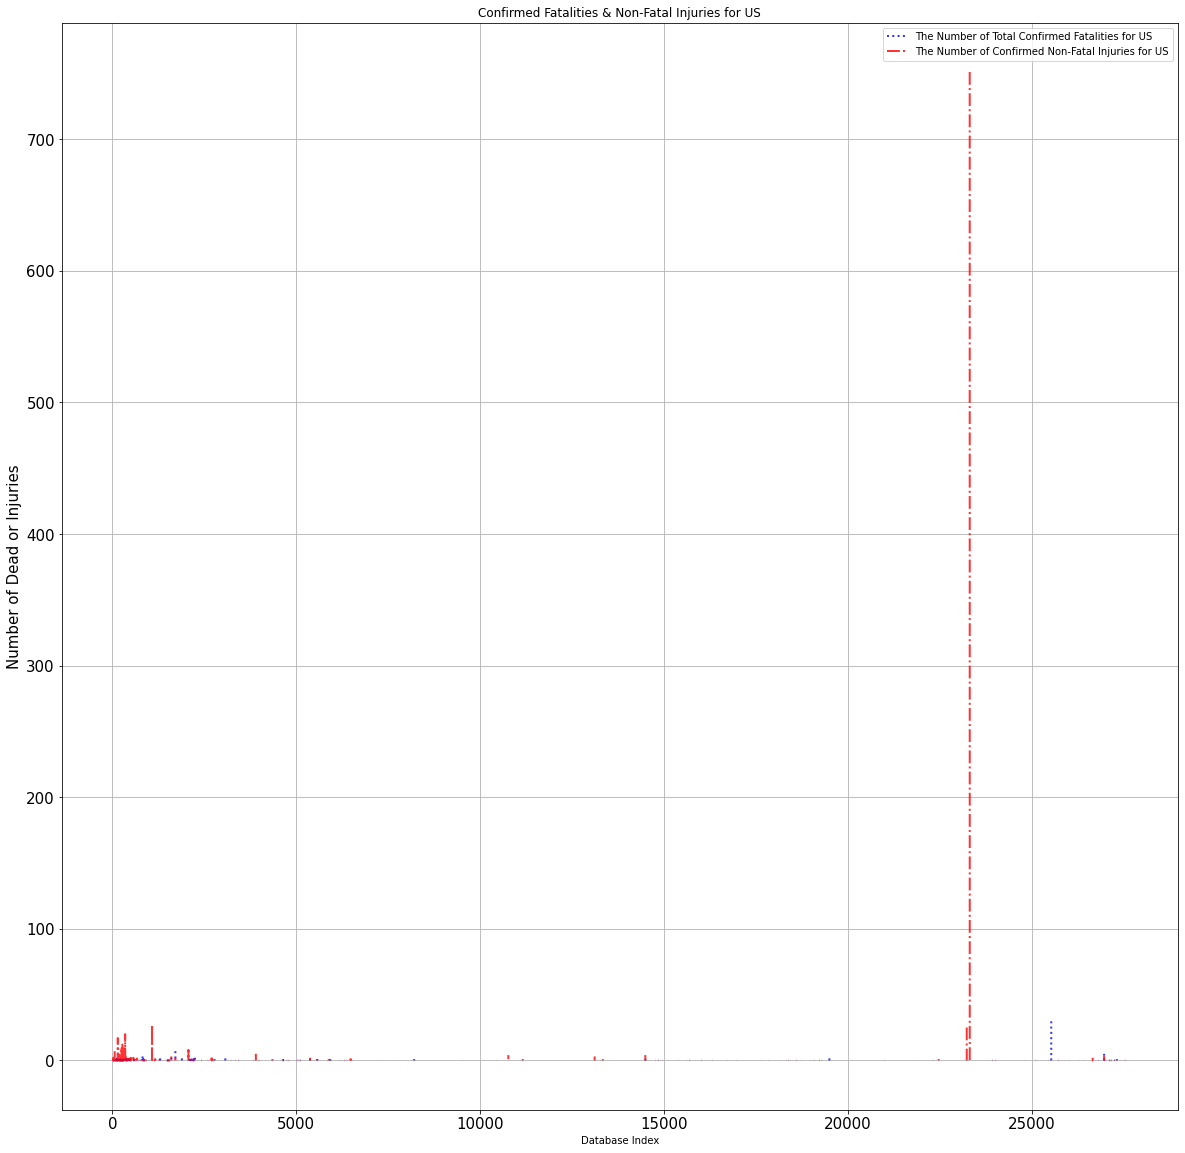

In [17]:
dataset.nkillus.plot(kind = 'line', color = 'blue', label = 'The Number of Total Confirmed Fatalities for US', linewidth = 2, alpha = 0.8, grid = True, 
                 linestyle = ':', figsize = (20,20), fontsize=15)
dataset.nwoundus.plot(color = "red", label = 'The Number of Confirmed Non-Fatal Injuries for US', linewidth = 2, alpha = 0.8, grid = True, 
                 linestyle = '-.', figsize = (20,20), fontsize=15)

plt.legend(loc='upper right')     # legend = puts label into plot
plt.xlabel('Database Index', fontsize=10)              # label = name of label
plt.ylabel('Number of Dead or Injuries', fontsize=15)

plt.title('Confirmed Fatalities & Non-Fatal Injuries for US')            #plot title
plt.show()

## **Death and Injuries at all time**

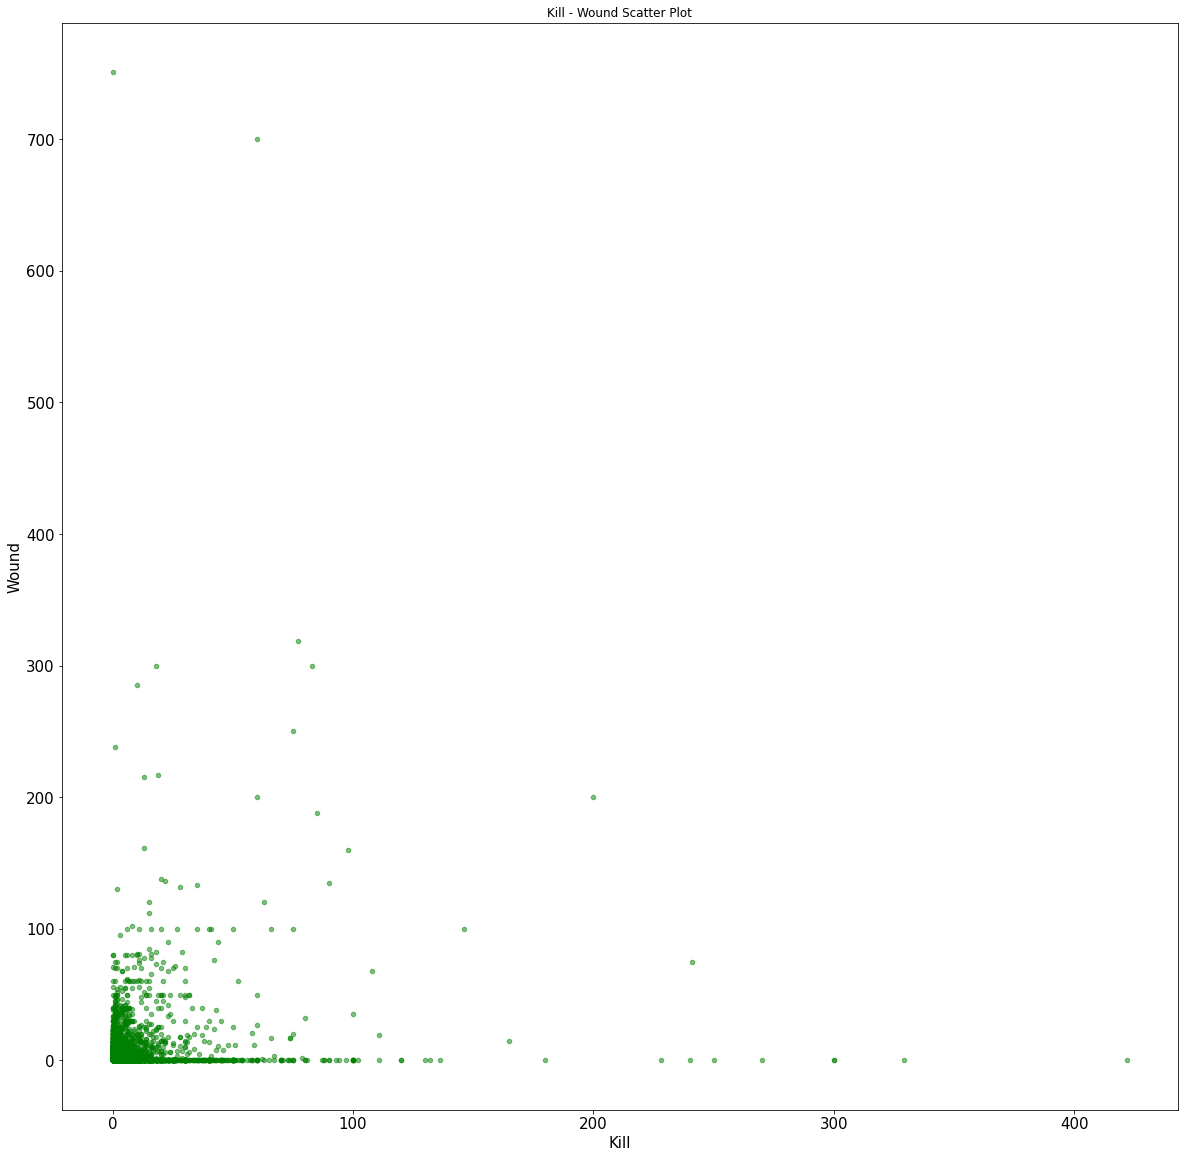

In [19]:
dataset.plot(kind = 'scatter', x = 'nkill', y = 'nwound', alpha = 0.5, color = 'Green', figsize = (20,20), fontsize=15)
plt.xlabel('Kill', fontsize=15)
plt.ylabel('Wound', fontsize=15)
plt.title('Kill - Wound Scatter Plot')
plt.show()

 mortality rate and injuries were low, but a small number of actions led to too many deaths and injuries

## **Frequency of Terrorist Actions in Customized Region**

**analyze in Middle East and North Africa**

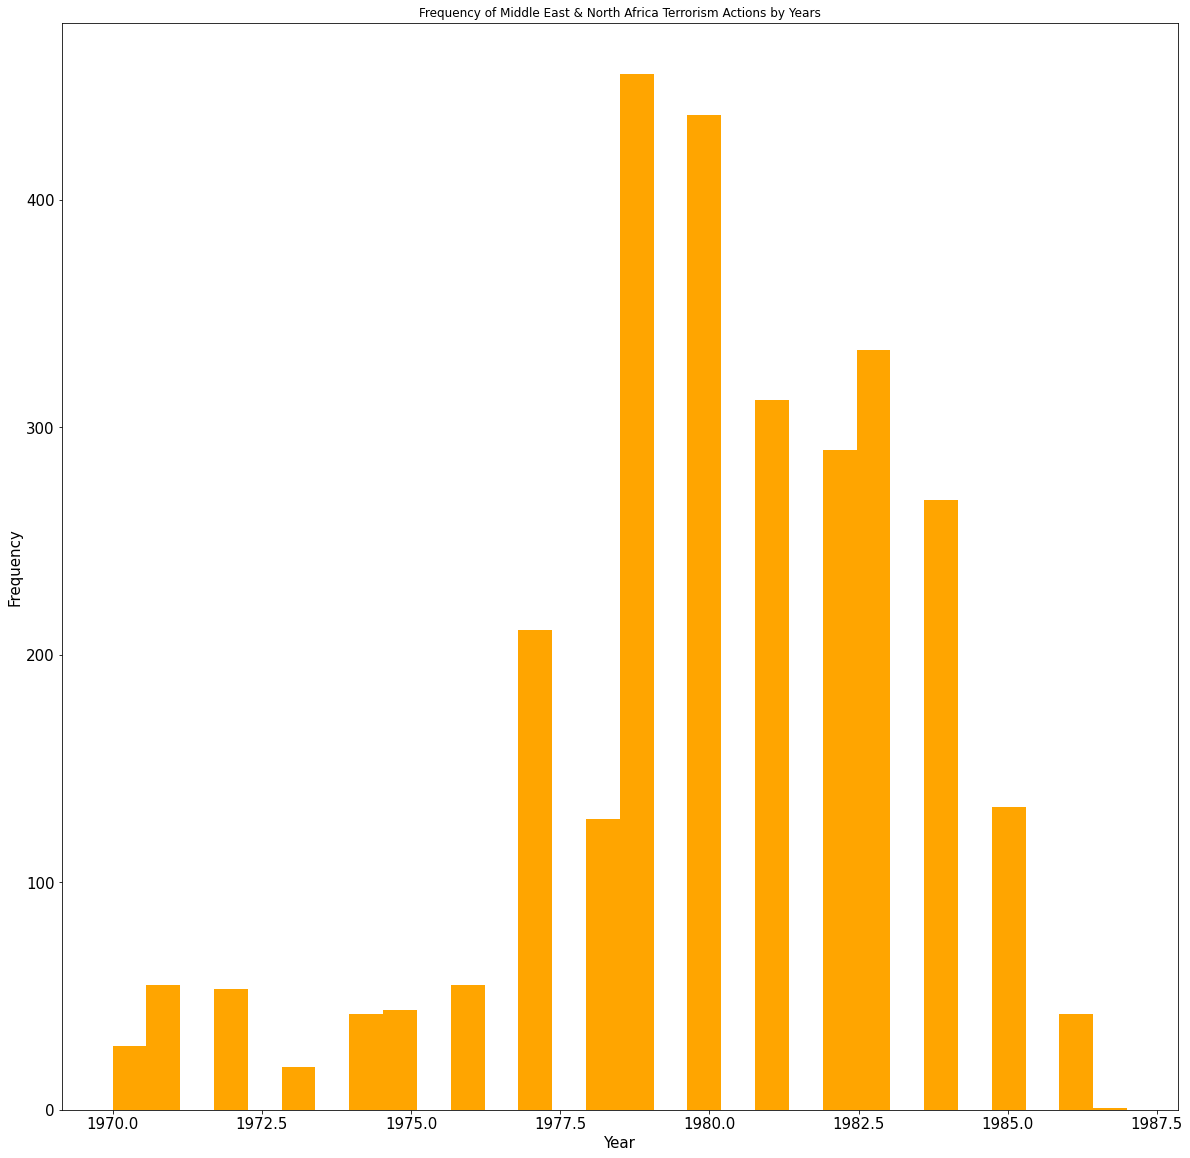

In [20]:
middleEastData = dataset[dataset['region'] == 10]
middleEastData.iyear.plot(kind = 'hist', bins = 30, figsize = (20,20), color = 'Orange', fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Frequency of Middle East & North Africa Terrorism Actions by Years')
plt.show()

Terrorist attacks have increased in recent years

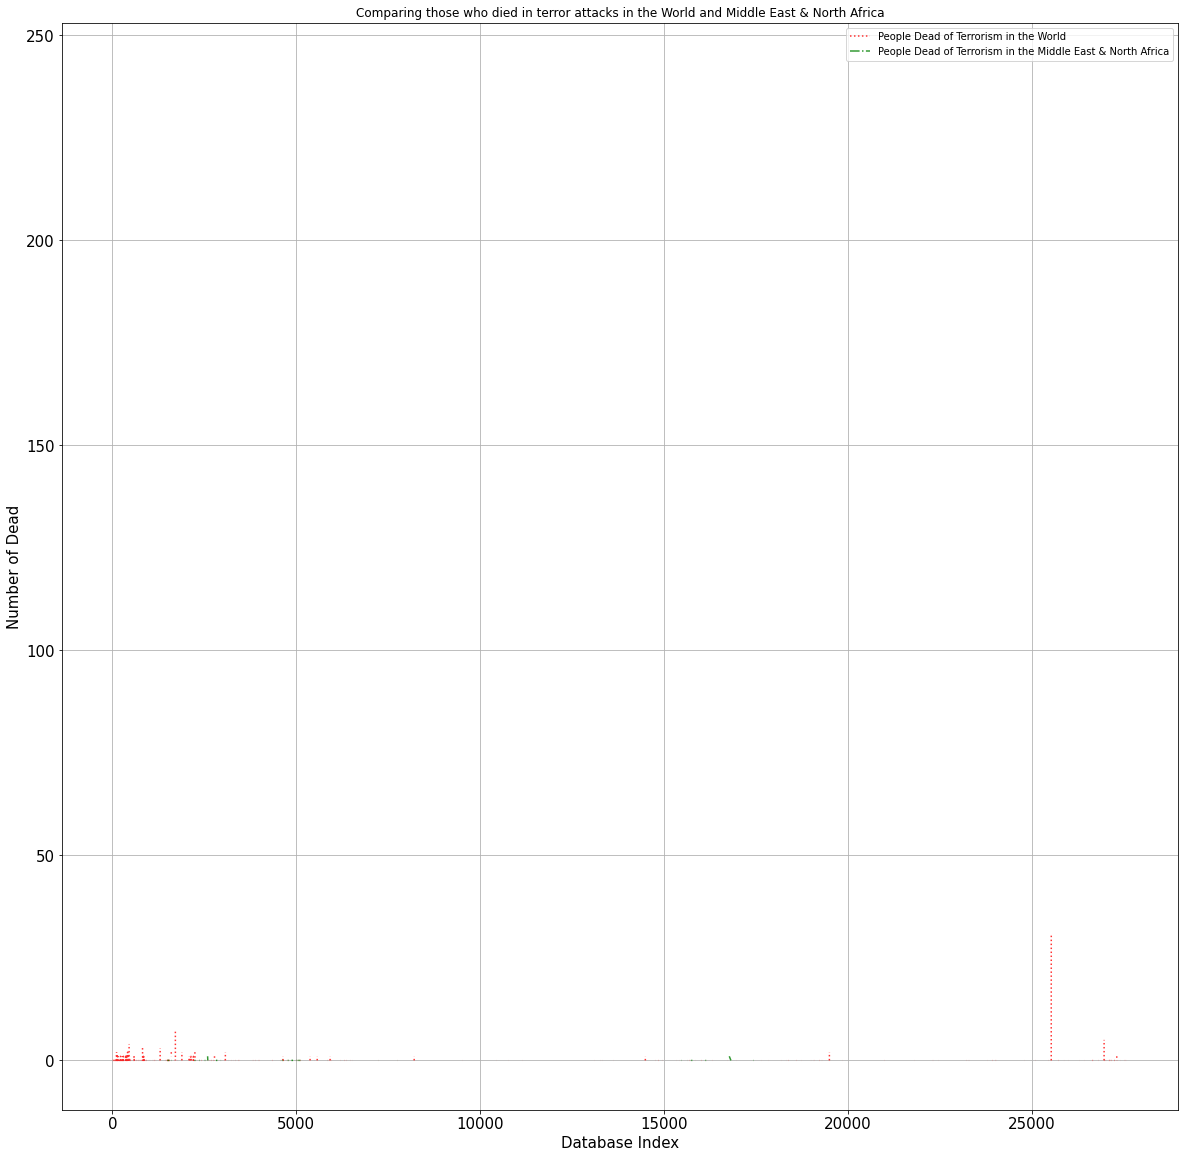

In [22]:
dataset.nkillus.plot(kind = 'line', color = 'red', label = 'People Dead of Terrorism in the World', linewidth = 1.5, alpha = 0.8, grid = True, 
                 linestyle = ':', figsize = (20,20), fontsize=15)
middleEastData.nkillus.plot(color = "green", label = 'People Dead of Terrorism in the Middle East & North Africa', linewidth = 1.5, alpha = 0.8, 
                            grid = True, linestyle = '-.', figsize = (20,20), fontsize=15)

plt.legend(loc='upper right')     # legend = puts label into plot
plt.xlabel('Database Index', fontsize=15)              # label = name of label
plt.ylabel('Number of Dead', fontsize=15)

plt.title('Comparing those who died in terror attacks in the World and Middle East & North Africa')            #plot title
plt.show()


## **Terrorist Attacks of a Particular year and their Locations.**

**look at the terrorist acts in the world over a certain year**

In [23]:
filterYear = dataset['iyear'] == 1970

In [24]:
filterData = dataset[filterYear] # filter data
# filterData.info()
reqFilterData = filterData.loc[:,'city':'longitude'] #We are getting the required fields
reqFilterData = reqFilterData.dropna() # drop NaN values in latitude and longitude
reqFilterDataList = reqFilterData.values.tolist()
# reqFilterDataList

In [ ]:
map = folium.Map(location = [0, 30], tiles='CartoDB positron', zoom_start=2)
# clustered marker
markerCluster = folium.plugins.MarkerCluster().add_to(map)
for point in range(0, len(reqFilterDataList)):
    folium.Marker(location=[reqFilterDataList[point][1],reqFilterDataList[point][2]], popup = reqFilterDataList[point][0]).add_to(markerCluster)
map

In [26]:
killData = dataset.loc[:,'nkill']
print('Number of people killed by terror attack:', int(sum(killData.dropna())))# drop the NaN values

Number of people killed by terror attack: 49843


In [27]:
attackData = dataset.loc[:,'attacktype1':'attacktype1_txt']
# attackData
typeKillData = pd.concat([attackData, killData], axis=1)

In [28]:
typeKillFormatData = typeKillData.pivot_table(columns='attacktype1_txt', values='nkill', aggfunc='sum')
typeKillFormatData

attacktype1_txt,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
nkill,28499.0,5335.0,10492.0,1026.0,297.0,467.0,545.0,25.0,3157.0


In [29]:
typeKillFormatData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, nkill to nkill
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Armed Assault                        1 non-null      float64
 1   Assassination                        1 non-null      float64
 2   Bombing/Explosion                    1 non-null      float64
 3   Facility/Infrastructure Attack       1 non-null      float64
 4   Hijacking                            1 non-null      float64
 5   Hostage Taking (Barricade Incident)  1 non-null      float64
 6   Hostage Taking (Kidnapping)          1 non-null      float64
 7   Unarmed Assault                      1 non-null      float64
 8   Unknown                              1 non-null      float64
dtypes: float64(9)
memory usage: 80.0+ bytes


**Number of Killed in Terrorist Attacks by Countries**

In [30]:
countryData = dataset.loc[:,'country':'country_txt']
# countyData
countryKillData = pd.concat([countryData, killData], axis=1)

In [31]:
countryKillFormatData = countryKillData.pivot_table(columns='country_txt', values='nkill', aggfunc='sum')
countryKillFormatData

country_txt,Afghanistan,Albania,Algeria,Andorra,Angola,Argentina,Australia,Austria,Bahamas,Bahrain,Bangladesh,Barbados,Belgium,Belize,Bolivia,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Cambodia,Canada,Central African Republic,Chad,Chile,Colombia,Costa Rica,Cyprus,Czechoslovakia,Denmark,Djibouti,Dominica,Dominican Republic,East Germany (GDR),Ecuador,Egypt,El Salvador,Ethiopia,Falkland Islands,France,...,Romania,Saudi Arabia,Senegal,Seychelles,Singapore,Somalia,South Africa,South Korea,South Vietnam,South Yemen,Soviet Union,Spain,Sri Lanka,Sudan,Suriname,Swaziland,Sweden,Switzerland,Syria,Taiwan,Tanzania,Thailand,Togo,Trinidad and Tobago,Tunisia,Turkey,Uganda,United Arab Emirates,United Kingdom,United States,Uruguay,Vatican City,Venezuela,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yugoslavia,Zaire,Zambia,Zimbabwe
nkill,53.0,0.0,0.0,0.0,566.0,333.0,6.0,18.0,0.0,0.0,13.0,73.0,22.0,0.0,13.0,1.0,55.0,0.0,2.0,1.0,4.0,334.0,3.0,0.0,115.0,3283.0,11.0,31.0,26.0,1.0,5.0,3.0,11.0,1.0,14.0,77.0,9883.0,335.0,0.0,156.0,...,3.0,6.0,0.0,0.0,0.0,1.0,239.0,3.0,81.0,0.0,4.0,684.0,1320.0,310.0,0.0,1.0,7.0,50.0,497.0,25.0,1.0,191.0,1.0,0.0,41.0,364.0,459.0,121.0,2250.0,230.0,4.0,0.0,46.0,70.0,79.0,0.0,6.0,3.0,5.0,69.0


In [32]:

countryKillFormatData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, nkill to nkill
Columns: 137 entries, Afghanistan to Zimbabwe
dtypes: float64(137)
memory usage: 1.1+ KB


In [33]:

fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size

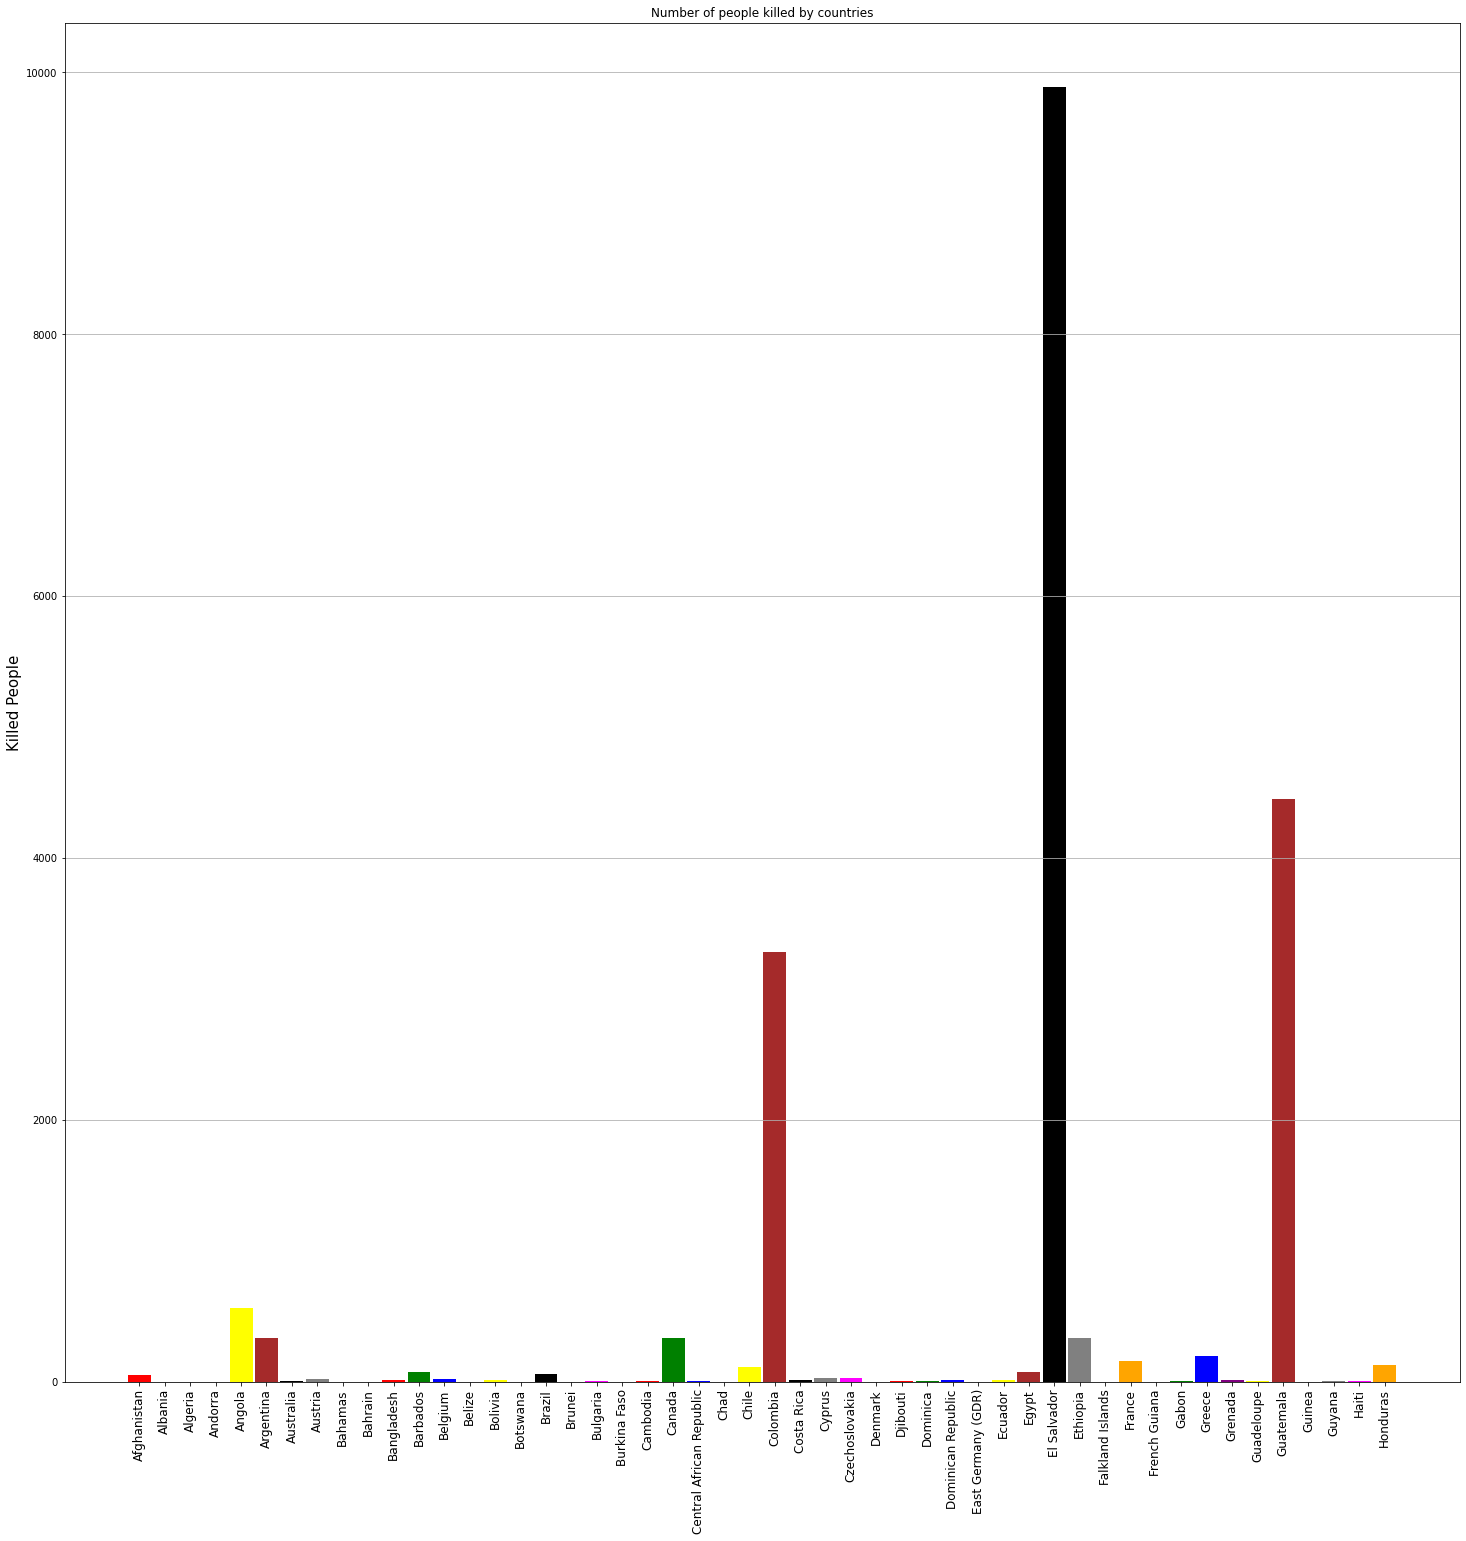

In [34]:
labels = countryKillFormatData.columns.tolist()
labels = labels[:50] #50 bar provides nice view
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[:50]
values = [int(i[0]) for i in values] # convert float to int
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange'] # color list for bar chart bar color 
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=15)
plt.xticks(index, labels, fontsize=12, rotation=90)
plt.title('Number of people killed by countries')
# print(fig_size)
plt.show()

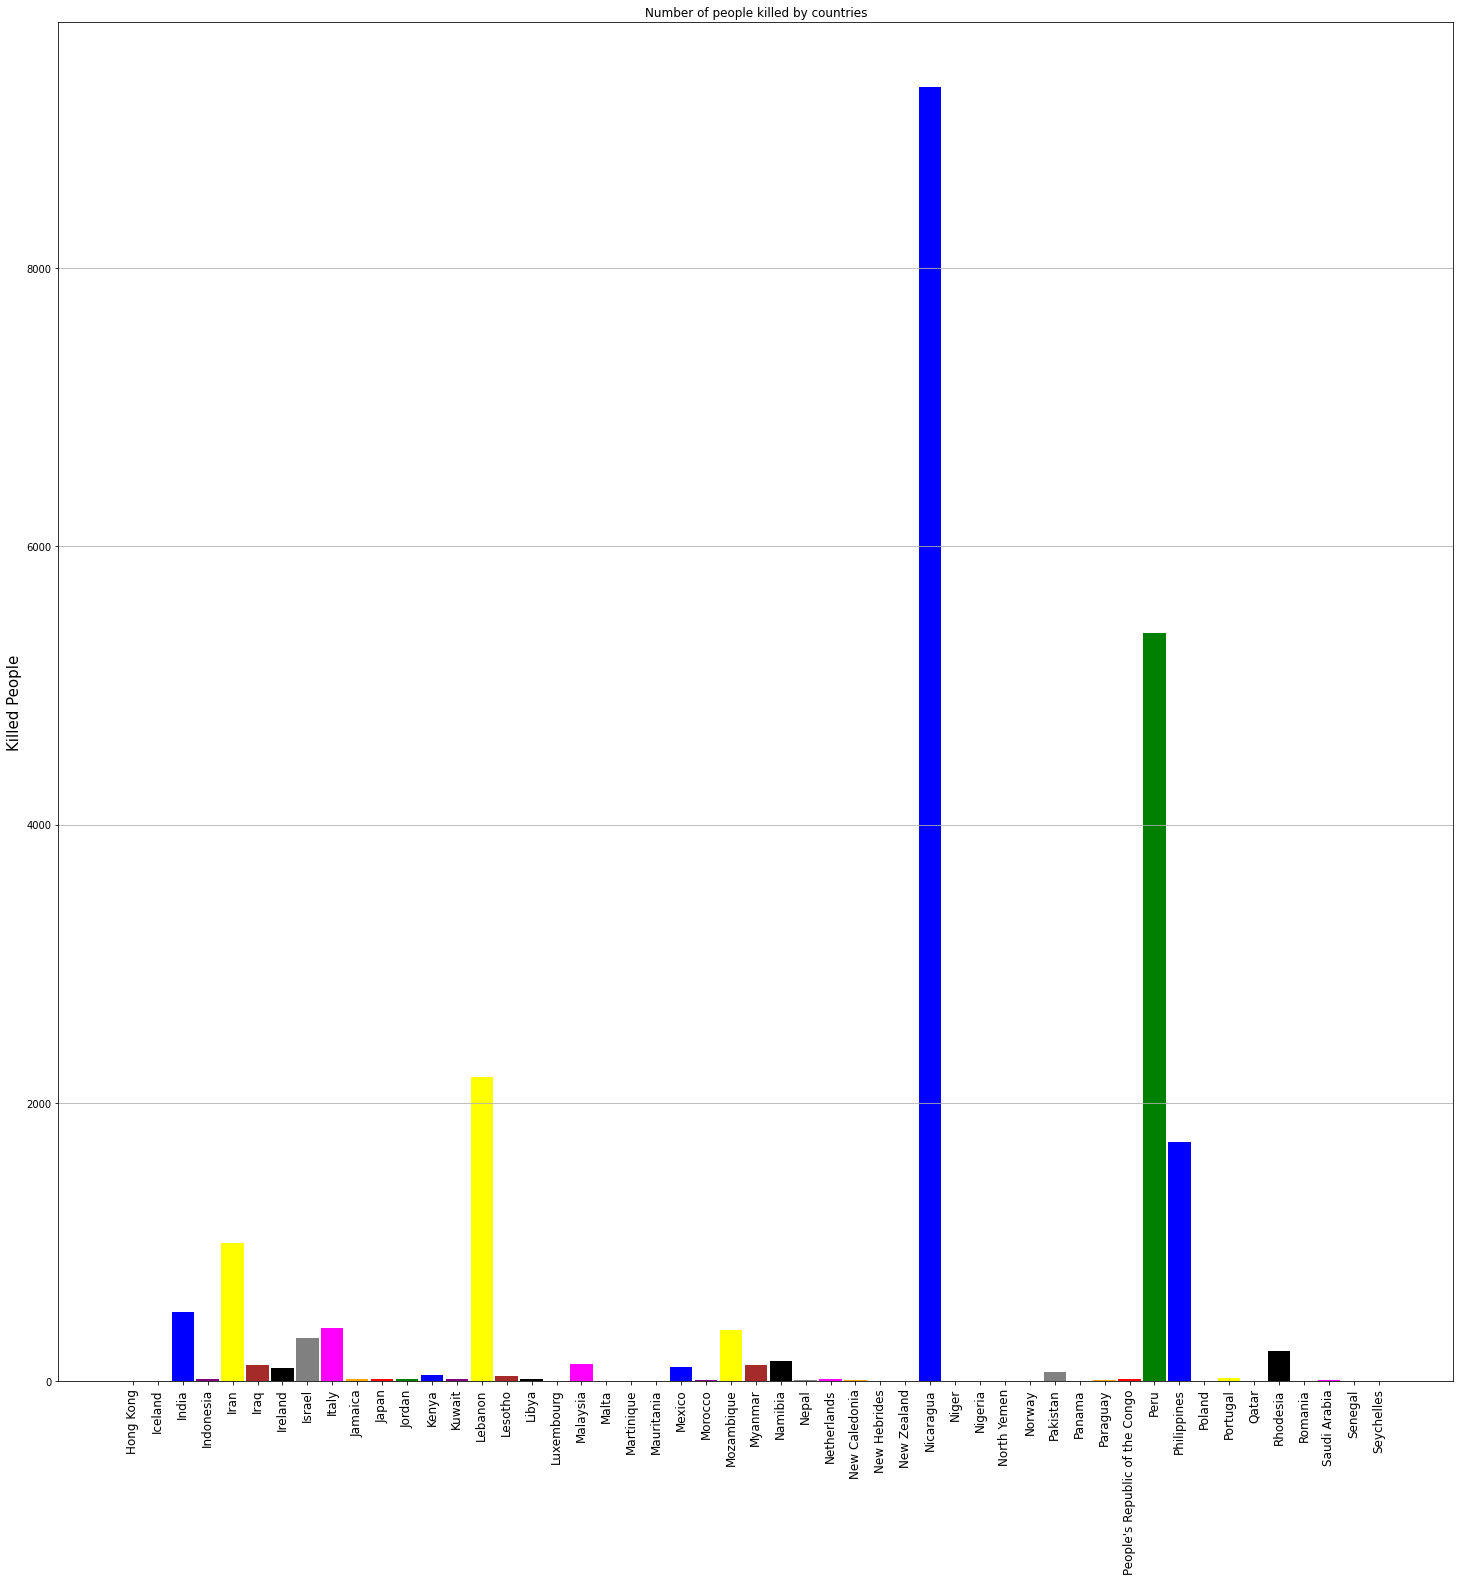

In [35]:
labels = countryKillFormatData.columns.tolist()
labels = labels[50:101]
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[50:101]
values = [int(i[0]) for i in values]
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange']
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=15)
plt.xticks(index, labels, fontsize=12, rotation=90)
plt.title('Number of people killed by countries')
plt.show()